In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [60]:
import pandas as pd
df_HD=pd.read_csv("Heart Disease.csv", sep=",")
df_HD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,4,140,260,0,1,112,1,3.0,2,6,2
1,44,1,4,130,209,0,1,127,0,0.0,2,6,0
2,60,1,4,132,218,0,1,140,1,1.5,3,6,2
3,55,1,4,142,228,0,1,149,1,2.5,1,6,1
4,66,1,3,110,213,1,2,99,1,1.3,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,58,1,2,126,0,1,0,110,1,2.0,2,3,2
65,69,1,3,140,0,1,1,118,0,2.5,3,3,2
66,67,1,1,142,270,1,0,125,0,2.5,1,3,3
67,58,1,4,120,0,0,2,106,1,1.5,3,7,1


In [99]:
#statistical description
df_HD.describe()
#high std deviation for trestbps and thalach
#mean is less than median in most cases except for target
#differencein max and 75% percentile isnot very high. So less outliers is denoted.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,58.855072,0.985507,3.521739,121.289855,5.832761,0.333333,0.681159,120.869565,0.594203,1.330435,2.391304,5.173913,1.478261
std,6.826151,0.120386,0.719655,41.515093,7.399865,0.474858,0.629957,22.659184,0.494643,1.037432,0.711614,1.644568,1.195687
min,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,56.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,107.000000,0.000000,0.000000,2.000000,3.000000,0.000000
50%,60.000000,1.000000,4.000000,126.000000,0.000000,0.000000,1.000000,120.000000,1.000000,1.500000,3.000000,6.000000,1.000000
75%,63.000000,1.000000,4.000000,140.000000,14.764823,1.000000,1.000000,133.000000,1.000000,2.000000,3.000000,6.000000,2.000000
max,77.000000,1.000000,4.000000,180.000000,17.776389,1.000000,2.000000,180.000000,1.000000,3.000000,3.000000,7.000000,4.000000


In [61]:
#age: displays age of patient
#sex: 1=male,0=female
#chest pain type(cp): 1=typical angina,2=atypical angina,3=non anginal pain,4=asymptotic
#Rest blood pressure(trestbps):mmHg (unit)
#Serum cholestrol(chol): mg/dl(unit)
#Fasting Blood Sugar(fbs): >120mg/dl then:1(true) else:0(false)
#Resting ecg(restecg): 0=normal,1=ST-T wave abnormality,2= left ventricular hyperthrophy
#Max heart rate(thalach)
#Exercise induced angina(exang): 1=yes,0=no
#thal:displays thalassemia: 3=normal,6=fixed defect,7=reversible defect
#Target:heart disease diagnose, 0 =absence 1,2,3,4=present

In [62]:
df_HD.isnull().sum()
#no null values present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [63]:
df_HD.shape

(69, 13)

In [64]:
df_cor=df_HD.corr()
df_cor
#target ismoderately correlated with other inputs.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
age,1.000000,-0.074175,-0.110112,0.064446,-0.049338,-0.034782,0.043813,-0.333556,0.221870,0.165515,-0.178880,-0.052741,0.212216
sex,-0.074175,1.000000,0.258304,0.056760,0.093945,0.085749,0.132085,0.004688,-0.100215,-0.196589,-0.104489,-0.061361,0.151025
cp,-0.110112,0.258304,1.000000,-0.018426,-0.038844,-0.129099,0.145267,-0.232044,0.231706,-0.206736,0.083651,0.046461,0.030465
trestbps,0.064446,0.056760,-0.018426,1.000000,-0.072763,-0.036304,0.175090,0.151508,0.109651,0.138079,-0.078563,0.146580,-0.109782
chol,-0.049338,0.093945,-0.038844,-0.072763,1.000000,0.231801,0.092571,0.124726,-0.025312,0.008603,-0.033346,-0.176159,0.084118
fbs,-0.034782,0.085749,-0.129099,-0.036304,0.231801,1.000000,0.114708,0.179042,-0.166957,-0.053733,-0.043519,0.037662,0.129503
restecg,0.043813,0.132085,0.145267,0.175090,0.092571,0.114708,1.000000,0.051646,0.003420,-0.020937,0.085577,0.025921,-0.028861
thalach,-0.333556,0.004688,-0.232044,0.151508,0.124726,0.179042,0.051646,1.000000,-0.167488,0.180215,-0.258537,0.207801,-0.116534
exang,0.221870,-0.100215,0.231706,0.109651,-0.025312,-0.166957,0.003420,-0.167488,1.000000,0.061676,-0.085374,-0.020436,0.208646
oldpeak,0.165515,-0.196589,-0.206736,0.138079,0.008603,-0.053733,-0.020937,0.180215,0.061676,1.000000,-0.201624,-0.060036,0.201489


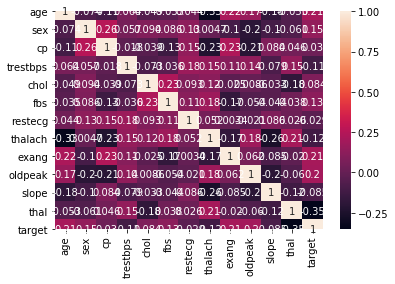

In [65]:
sns.heatmap(df_HD.corr(),annot=True)
#target negatively correlated with thal.
#age negatively correlated with thalach
#others moderatelycorrelated

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E4374912C8>,
      dtype=object)

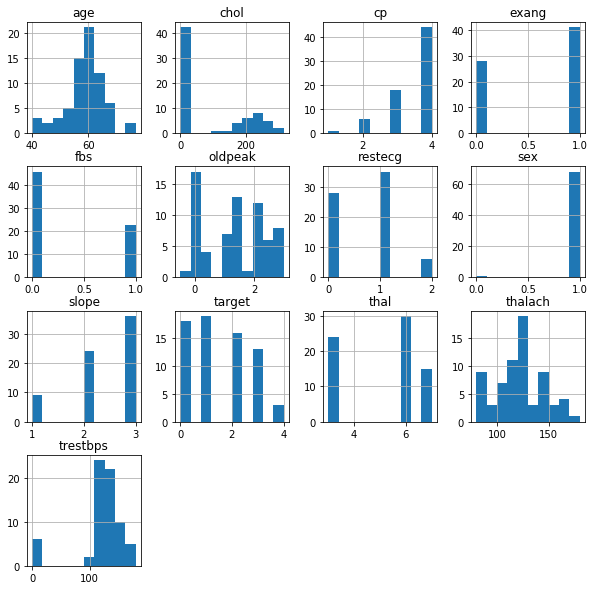

In [66]:
df_HD.hist(figsize=(10,10))
#age is normally distributed.
#others need to be treated for skewness

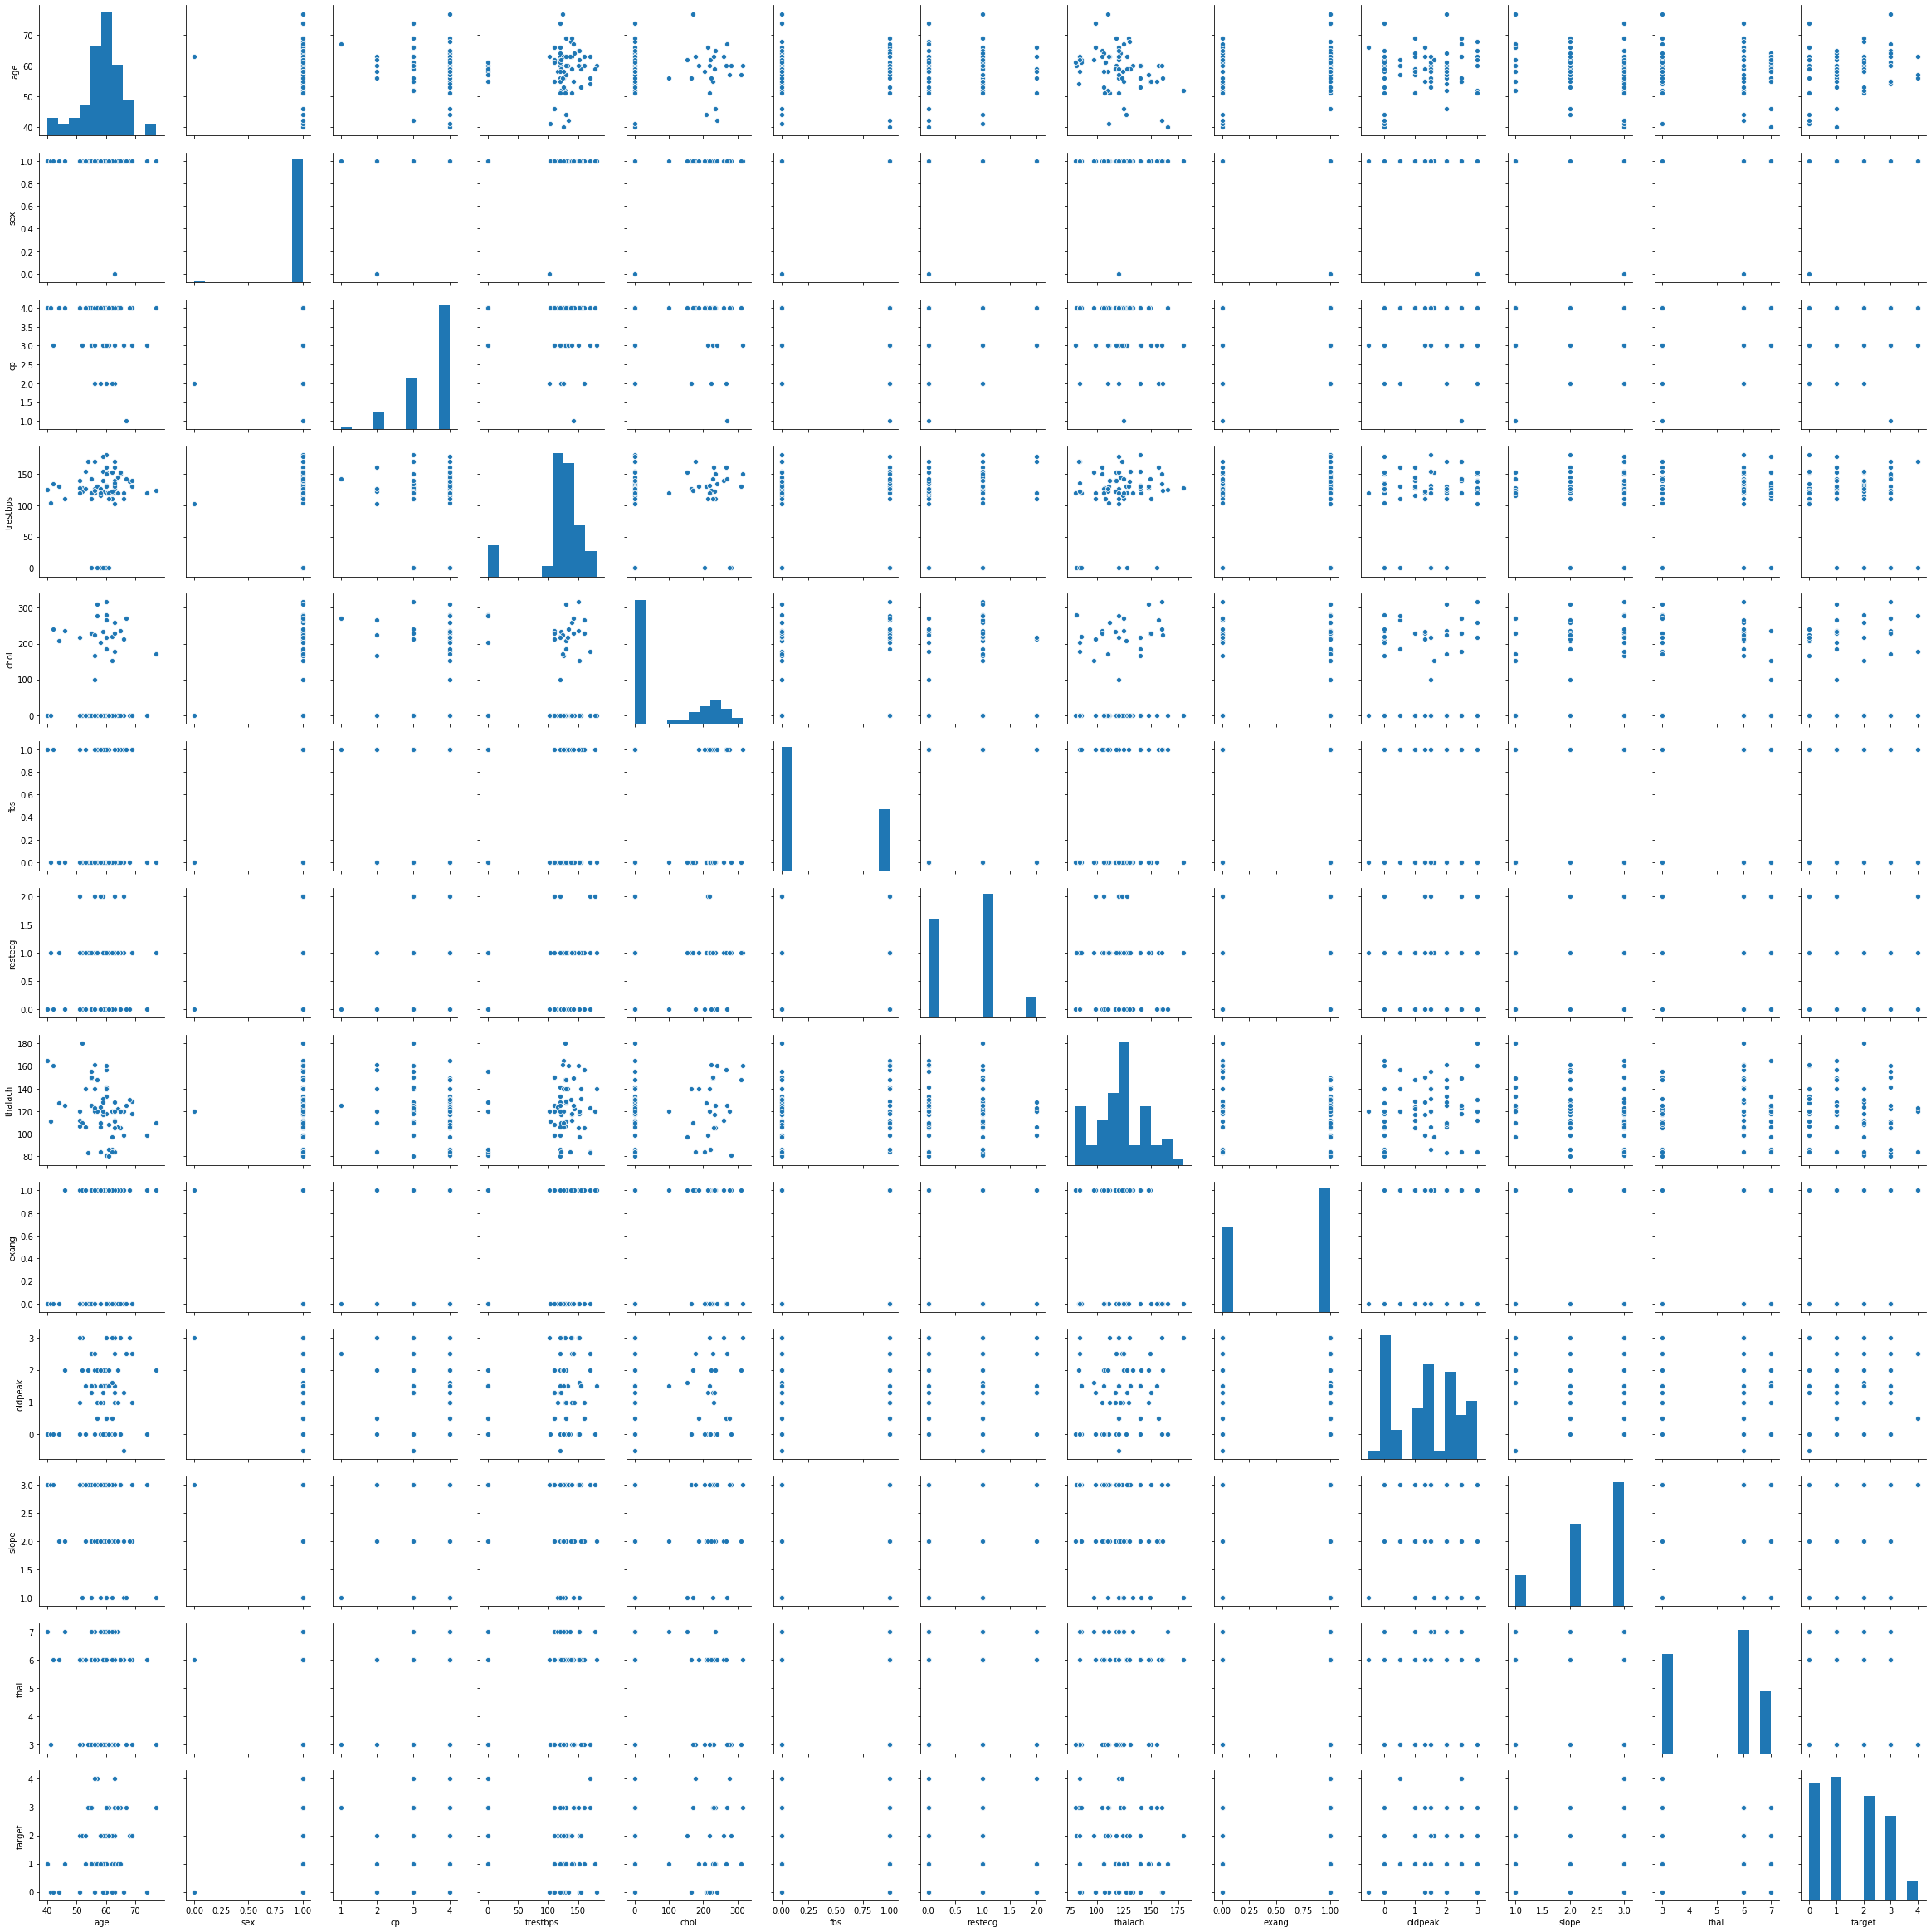

In [67]:
sns.pairplot(df_HD)

In [68]:
df_HD.skew()

age        -0.499958
sex        -8.306624
cp         -1.419052
trestbps   -2.032489
chol        0.646965
fbs         0.722918
restecg     0.366435
thalach     0.213163
exang      -0.392262
oldpeak     0.024210
slope      -0.737903
thal       -0.470964
target      0.318643
dtype: float64

In [69]:
#Treating skewness
import numpy as np
for col in df_HD.columns:
    if df_HD.skew().loc[col]>0.55:
        df_HD[col]=np.sqrt(df_HD[col])

In [70]:
df_HD.skew()

age        -0.499958
sex        -8.306624
cp         -1.419052
trestbps   -2.032489
chol        0.512058
fbs         0.722918
restecg     0.366435
thalach     0.213163
exang      -0.392262
oldpeak     0.024210
slope      -0.737903
thal       -0.470964
target      0.318643
dtype: float64

In [71]:
#Removing outliers with zscore
from scipy.stats import zscore
z_score=abs(zscore(df_HD))
print(df_HD.shape)
df_HD_final=df_HD.loc[(z_score<3).all(axis=1)]
print(df_HD_final.shape)

(69, 13)
(67, 13)


In [72]:
import numpy as np
df_x=df_HD_final.drop(columns=["target"])
y=df_HD_final[["target"]]

In [73]:
#separating input and target
X = df_HD.drop('target', axis=1)
Y = df_HD['target']

In [74]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [75]:
x.skew()

age        -0.499958
sex        -8.306624
cp         -1.419052
trestbps   -2.032489
chol        0.512058
fbs         0.722918
restecg     0.366435
thalach     0.213163
exang      -0.392262
oldpeak     0.024210
slope      -0.737903
thal       -0.470964
dtype: float64

In [84]:
#calculating max r2 score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,Y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [85]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,Y)

r2 score corresponding to  42  is  0.20390008326315456
r2 score corresponding to  43  is  -0.23467442382317394
r2 score corresponding to  44  is  -0.41542721273649663
r2 score corresponding to  45  is  0.2839334814573178
r2 score corresponding to  46  is  0.009838687014208203
r2 score corresponding to  47  is  -0.38748580563601265
r2 score corresponding to  48  is  0.31439875978086496
r2 score corresponding to  49  is  -0.0329359901767734
r2 score corresponding to  50  is  -0.28568351207712683
r2 score corresponding to  51  is  -0.45268391270486386
r2 score corresponding to  52  is  -1.0668037653245372
r2 score corresponding to  53  is  -0.4819650654946397
r2 score corresponding to  54  is  -0.19633992970402603
r2 score corresponding to  55  is  -0.23271515037497847
r2 score corresponding to  56  is  -0.44601182104548176
r2 score corresponding to  57  is  -0.2498449355387391
r2 score corresponding to  58  is  0.049624118542855755
r2 score corresponding to  59  is  -1.3217419178325707
r

In [86]:
#Use GridSearchCV to find value of n_neighbors in KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,22)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,Y)
gknr.best_params_

{'n_neighbors': 13}

In [87]:
#Calculating r2 score for KNN model based on n_neighbors value
knr=KNeighborsRegressor(n_neighbors=13)
r_state=maxr2_score(knr,x,Y)

r2 score corresponding to  42  is  0.11541608963867567
r2 score corresponding to  43  is  -0.21753347866708195
r2 score corresponding to  44  is  -0.10441590656572153
r2 score corresponding to  45  is  0.16124260355029585
r2 score corresponding to  46  is  0.11084812623274176
r2 score corresponding to  47  is  -0.03472633136094694
r2 score corresponding to  48  is  0.18128459629700333
r2 score corresponding to  49  is  -0.0836921235005641
r2 score corresponding to  50  is  0.034720805277834166
r2 score corresponding to  51  is  -0.28021749560211084
r2 score corresponding to  52  is  -0.008859747321286138
r2 score corresponding to  53  is  0.14969276285844324
r2 score corresponding to  54  is  0.054727589678116306
r2 score corresponding to  55  is  -0.028079612694997147
r2 score corresponding to  56  is  0.03715775749674066
r2 score corresponding to  57  is  -0.31845304970913557
r2 score corresponding to  58  is  0.11283062762352714
r2 score corresponding to  59  is  -0.3208976764323856

In [88]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNR Regression: ",cross_val_score(knr,x,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  -0.16729575518907178
standard deviation in r2 score for Linear Regression:  0.07453190808612788

Mean r2 score for KNN Regression:  -0.07840006011086195
standard deviation in r2 score for KNR Regression:  0.10697588340665075


In [89]:
#Check Lasso Regression to find best alpha value
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,Y)
clf.best_params_

{'alpha': 0.1}

In [90]:
#max r2 score for Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,Y)

r2 score corresponding to  42  is  0.15948716785105843
r2 score corresponding to  43  is  -0.17009200997748297
r2 score corresponding to  44  is  -0.2498707130581055
r2 score corresponding to  45  is  0.21172944117420123
r2 score corresponding to  46  is  0.13445282775395062
r2 score corresponding to  47  is  -0.02493379765811654
r2 score corresponding to  48  is  0.12005915956415902
r2 score corresponding to  49  is  -0.016580919908552927
r2 score corresponding to  50  is  -0.10253340269625633
r2 score corresponding to  51  is  -0.2464752815294584
r2 score corresponding to  52  is  -0.22524481351526737
r2 score corresponding to  53  is  -0.027459793957573364
r2 score corresponding to  54  is  -0.18826203025332244
r2 score corresponding to  55  is  -0.0874997842674965
r2 score corresponding to  56  is  -0.03952412322676002
r2 score corresponding to  57  is  -0.1874198179186919
r2 score corresponding to  58  is  0.09636013719635683
r2 score corresponding to  59  is  -0.8799932775349772


In [91]:
#cross val score for Lasso
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -0.09269686859769959
standard deviation in r2 score for Lasso Regression:  0.14783205916833642


In [92]:
#checking RMSE and r2 score for Linear regression
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 48, test_size = 0.30)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [93]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.1311482206911019
r2_score is:  -0.19041744104037295


In [94]:
#checking RMSE and r2 score for Lasso
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 73, test_size = 0.30)
lsreg=Lasso()
lsreg.fit(x_train,y_train)
y_pred=lsreg.predict(x_test)

In [95]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.1407625895488884
r2_score is:  -0.003305288461538325


In [96]:
##checking RMSE and r2 score for KNeighbors Regressor
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 48, test_size = 0.30)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [97]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.2843378875996028
r2_score is:  -0.5346835443037976


In [ ]:
#saving Linear Regression as the final model
!pip install joblib
from sklearn.externals import joblib
joblib.dump(lreg, "HeartDisease_lreg.pkl")